In [1]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler
import numpy as np
import matplotlib.pyplot as plt
import dragoman as dm
from scipy import stats
import scipy

In [2]:
plt.rcParams['figure.figsize'] = [10., 10.]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14 
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 14

# Generate some toy data

Assuming uniform distribution of background, and a Gaussian for signal
Weights are uniform for background, and ones for signal

In [469]:
signal = True
N_bkgd = 50
N_sig = 10

In [470]:
x = np.cumsum(np.random.rand(N_bkgd))
w = np.random.rand(N_bkgd)

x -= np.min(x)
x /= np.max(x)

if signal:
    signal_x = np.random.randn(N_sig) / 30 + 0.3
    signal_w = np.ones_like(signal_x)

    x = np.concatenate([x, signal_x])
    w = np.concatenate([w, signal_w])

    indices = np.argsort(x)
    x = x[indices]
    w = w[indices]

    x -= np.min(x)
    x /= np.max(x)

In [471]:
# exclude first and last
x = x[1:-1]
w = w[1:-1]

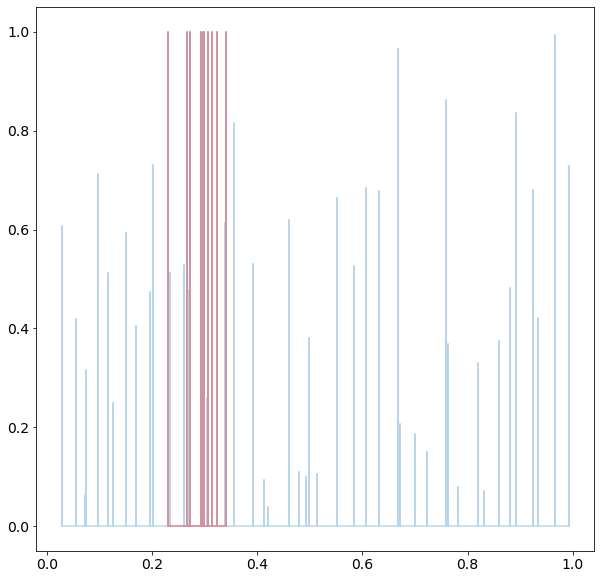

In [477]:
plt.plot(np.repeat(x, 3), np.stack([np.zeros_like(w), w, np.zeros_like(w)]).T.ravel(), alpha=0.3)

if signal:
    plt.plot(np.repeat(signal_x, 3), np.stack([np.zeros_like(signal_w), signal_w, np.zeros_like(signal_w)]).T.ravel(), alpha=0.3, c='r')

# Test

We test the difference of the cdf to the expectation of a normal distribution

Assuming Binomial statistics, the probability should be ${n\choose k}p^k(1-p)^{(n-k)}$, where p is the expected probabilit at position x, which is just s (since we normed to [0,1])). k is the number of smples up to point x, n total number of samples.

I tried to naivly extend this to weighted events....where n becomes sum(weights), k = sum(weights up to x), and the binomal coefficient i have no idea, just using what scipy spits out for non-integers

In [472]:
# unweighted
n = x.size 
k = np.arange(n)
p = scipy.special.binom(n, k) * x**k * (1-x)**(n-k)

# weighted
nw = np.sum(w)
kw = np.cumsum(w)
pw = scipy.special.binom(nw, kw) * x**kw * (1-x)**(nw-kw)

Here I just plot everything. Distributions, CDFs, p-values, ...

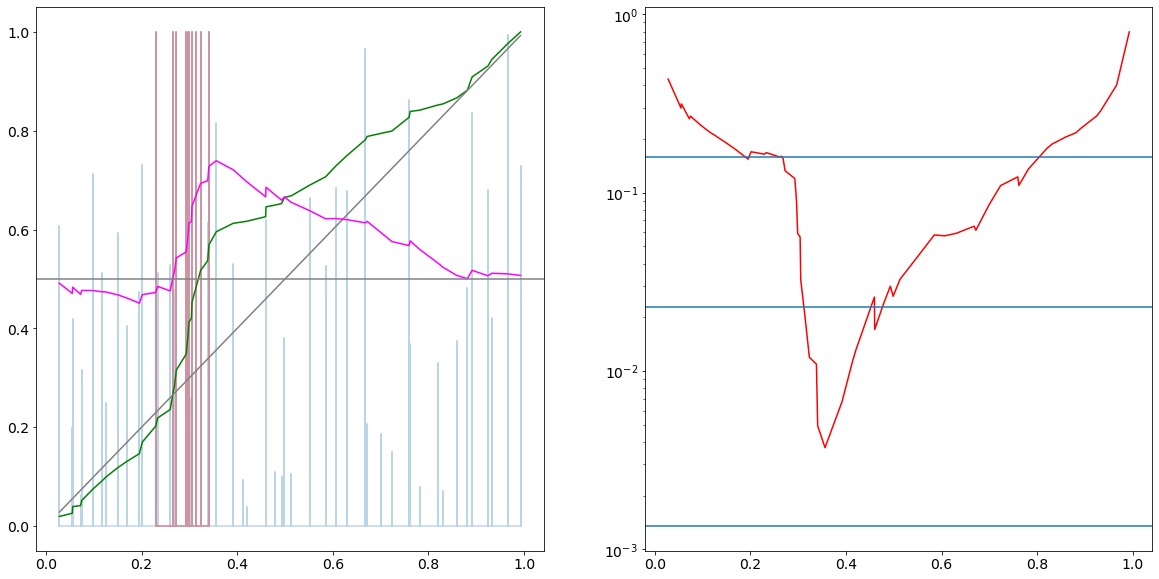

In [478]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))

ax[0].plot(np.repeat(x, 3), np.stack([np.zeros_like(w), w, np.zeros_like(w)]).T.ravel(), alpha=0.3)

if signal:
    ax[0].plot(np.repeat(signal_x, 3), np.stack([np.zeros_like(signal_w), signal_w, np.zeros_like(signal_w)]).T.ravel(), alpha=0.3, c='r')

ax[0].plot(x, np.cumsum(w)/np.sum(w), c='green')
ax[0].plot(x, x, c='grey')

ax[0].plot(x, np.cumsum(w)/np.sum(w) - x + 0.5, c='magenta')
ax[0].axhline(0.5, c='grey')

#ax[1].plot(x, p, c='r', ls='--')
ax[1].plot(x, pw, c='r', ls='-')

ax[1].axhline(1-stats.norm.cdf(1))
ax[1].axhline(1-stats.norm.cdf(2))
ax[1].axhline(1-stats.norm.cdf(3))

ax[1].set_yscale('log')